In [25]:
import random
import numpy as np
import pandas as pd
from numpy.linalg import norm
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import rankdata
import scipy.stats as ss

from gensim.models.doc2vec import Doc2Vec
from mofgraph2vec.featurize.mof2doc import MOF2doc

from sklearn.manifold import TSNE
import umap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.lines as mlines
mpl.rcParams["font.size"] = 18

In [2]:
def cosine(A, B):
    return np.dot(A,B)/(norm(A)*norm(B))

In [3]:
ARC_ID = "info.name"
df = pd.read_csv("../data/arc-core-xq-1120.csv")

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_5922/1758340273.py:2: DtypeWarning: Columns (22,25,106,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/arc-core-xq-1120.csv")


In [4]:
def load_vector(config, model):
    corpus = {}
    documents = {}
    test_ds = MOF2doc(cif_path=config["cif_list"], **config["corpus"]).get_documents()
    for dp in test_ds:
        documents.update(
            {dp.tags[0]: dp.words}
        )
        corpus.update(
            {dp.tags[0]: model.dv[dp.tags[0]]}
        )
    return documents, corpus

In [5]:
def pvalue(mofs, model):
    reference = mofs
    similar_matrix = []
    for i in reference:
        row = []
        for j in reference:
            vec_i = model.dv[i]
            vec_j = model.dv[j]
            row.append(
                cosine(vec_i, vec_j)
            )
        similar_matrix.append(row)
    thresholds = np.arange(-1, 1.05, 0.05)
    p_val = []
    n_reference = len(reference)
    for th in thresholds:
        p = sum(sum(np.array(similar_matrix) >= th)) / (n_reference**2)
        p_val.append(p)
        
    return p_val

In [6]:
baseline_config = {
    "corpus": {
        "embed_label": True,
        "label_path": "../data/arc-core-xq-1120.csv",
        "descriptors_to_embed": ["Di", "Df", "Dif", "info.density"],
        "category_to_embed": ["Crystalnet"],
        "tags_to_embed": [], 
        "id_column": "info.name",
        "wl_step": 2,
        "n_components": 20,
        "use_hash": False,
        "writing_style": "paragraph",
        "composition": False,
        "mode": "all",
        "embed_cif": False
    },
    "cif_list": ["../data/cifs/arc/"],
    "model_path": "../experiments/workflow/wandb/offline-run-20240402_114405-9m7v9c42/tmp/embedding_model.pt",
}

In [7]:
baseline_model = Doc2Vec.load(baseline_config['model_path'])

In [8]:
baseline_documents, baseline_corpus = load_vector(baseline_config, baseline_model)

/Users/xiaoqi/Documents/projects/proj_unsupervisedML/codes/mofgraph2vec/src/mofgraph2vec/featurize/mof2doc.py:44: DtypeWarning: Columns (22,25,106,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df_label = pd.read_csv(label_path).set_index(id_column)
100%|██████████| 22035/22035 [00:35<00:00, 627.33it/s]


In [9]:
mofs = random.sample(baseline_documents.keys(), 100)

In [10]:
baseline_pvalue = pvalue(mofs, baseline_model)

In [ ]:
# geometric features

## Geometric features

### No density

In [19]:
nodens_config = {
    "corpus": {
        "embed_label": True,
        "label_path": "../data/arc-core-xq-1120.csv",
        "descriptors_to_embed": ["Di", "Df", "Dif"], #, "info.density"],
        "category_to_embed": ["Crystalnet"],
        "tags_to_embed": [], 
        "id_column": "info.name",
        "wl_step": 1,
        "n_components": 20,
        "use_hash": False,
        "writing_style": "paragraph",
        "composition": False,
        "mode": "all",
        "embed_cif": False
    },
    "cif_list": ["../data/cifs/arc/"],
    "model_path": "../experiments/workflow/wandb/offline-run-20240402_161937-iqsq7xcd/tmp/embedding_model.pt",
}

nodens_model = Doc2Vec.load(nodens_config['model_path'])
nodens_pvalue = pvalue(mofs, nodens_model)

In [21]:
notopo_config = {
    "corpus": {
        "embed_label": True,
        "label_path": "../data/arc-core-xq-1120.csv",
        "descriptors_to_embed": ["Di", "Df", "Dif", "info.density"],
        "category_to_embed": [], #["Crystalnet"],
        "tags_to_embed": [], 
        "id_column": "info.name",
        "wl_step": 1,
        "n_components": 20,
        "use_hash": False,
        "writing_style": "paragraph",
        "composition": False,
        "mode": "all",
        "embed_cif": False
    },
    "cif_list": ["../data/cifs/arc/"],
    "model_path": "../experiments/workflow/wandb/offline-run-20240402_161937-iqsq7xcd/tmp/embedding_model.pt",
}

notopo_model = Doc2Vec.load(notopo_config['model_path'])
notopo_pvalue = pvalue(mofs, notopo_model)

In [23]:
nogeo_config = {
    "corpus": {
        "embed_label": True,
        "label_path": "../data/arc-core-xq-1120.csv",
        "descriptors_to_embed": [], # ["Di", "Df", "Dif"], #, "info.density"],
        "category_to_embed": ["Crystalnet"],
        "tags_to_embed": [], 
        "id_column": "info.name",
        "wl_step": 1,
        "n_components": 20,
        "use_hash": False,
        "writing_style": "paragraph",
        "composition": False,
        "mode": "all",
        "embed_cif": False
    },
    "cif_list": ["../data/cifs/arc/"],
    "model_path": "../experiments/workflow/wandb/offline-run-20240402_171003-wwixicsi/tmp/embedding_model.pt",
}

nogeo_model = Doc2Vec.load(nogeo_config['model_path'])
nogeo_pvalue = pvalue(mofs, nogeo_model)

In [ ]:
nochem_config = {
    "corpus": {
        "embed_label": True,
        "label_path": "../data/arc-core-xq-1120.csv",
        "descriptors_to_embed": ["Di", "Df", "Dif", "info.density"],
        "category_to_embed": ["Crystalnet"],
        "tags_to_embed": [], 
        "id_column": "info.name",
        "wl_step": 0,
        "n_components": 20,
        "use_hash": False,
        "writing_style": "paragraph",
        "composition": False,
        "mode": "all",
        "embed_cif": False
    },
    "cif_list": ["../data/cifs/arc/"],
    "model_path": "../experiments/workflow/wandb/offline-run-20240404_160937-yvvx9jnl/tmp/embedding_model.pt",
}

nochem_model = Doc2Vec.load(nochem_config['model_path'])
nochem_pvalue = pvalue(mofs, nochem_model)

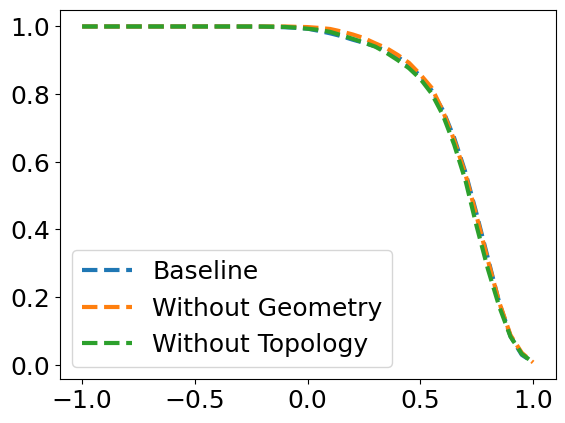

In [24]:
thresholds = np.arange(-1, 1.05, 0.05)
plt.plot(thresholds, baseline_pvalue, linewidth=3, linestyle='--', label="Baseline")
plt.plot(thresholds, nogeo_pvalue, linewidth=3, linestyle='--', label="Without Geometry")
plt.plot(thresholds, notopo_pvalue, linewidth=3, linestyle='--', label="Without Topology")
plt.legend()

## Depth of hash

In [11]:
hash1_config = {
    "corpus": {
        "embed_label": True,
        "label_path": "../data/arc-core-xq-1120.csv",
        "descriptors_to_embed": ["Di", "Df", "Dif", "info.density"],
        "category_to_embed": ["Crystalnet"],
        "tags_to_embed": [], 
        "id_column": "info.name",
        "wl_step": 1,
        "n_components": 20,
        "use_hash": False,
        "writing_style": "paragraph",
        "composition": False,
        "mode": "all",
        "embed_cif": False
    },
    "cif_list": ["../data/cifs/arc/"],
    "model_path": "../experiments/workflow/wandb/offline-run-20240402_160508-891gg8js/tmp/embedding_model.pt",
}

In [12]:
hash1_model = Doc2Vec.load(hash1_config['model_path'])
hash1_pvalue = pvalue(mofs, hash1_model)

In [15]:
hash3_config = {
    "corpus": {
        "embed_label": True,
        "label_path": "../data/arc-core-xq-1120.csv",
        "descriptors_to_embed": ["Di", "Df", "Dif", "info.density"],
        "category_to_embed": ["Crystalnet"],
        "tags_to_embed": [], 
        "id_column": "info.name",
        "wl_step": 1,
        "n_components": 20,
        "use_hash": False,
        "writing_style": "paragraph",
        "composition": False,
        "mode": "all",
        "embed_cif": False
    },
    "cif_list": ["../data/cifs/arc/"],
    "model_path": "../experiments/workflow/wandb/offline-run-20240402_161315-sgd5xgee/tmp/embedding_model.pt",
}

hash3_model = Doc2Vec.load(hash3_config['model_path'])
hash3_pvalue = pvalue(mofs, hash3_model)

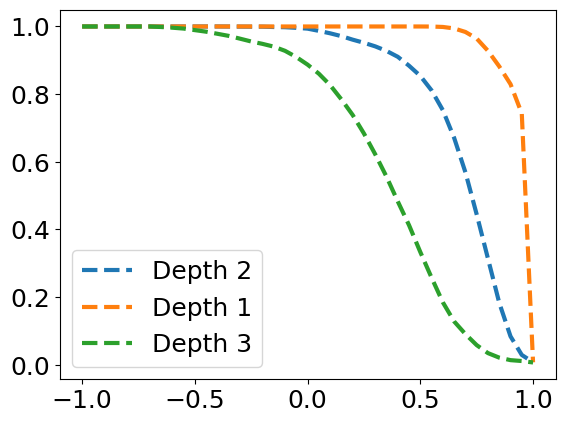

In [17]:
thresholds = np.arange(-1, 1.05, 0.05)
plt.plot(thresholds, baseline_pvalue, linewidth=3, linestyle='--', label="Depth 2")
plt.plot(thresholds, hash1_pvalue, linewidth=3, linestyle='--', label="Depth 1")
plt.plot(thresholds, hash3_pvalue, linewidth=3, linestyle='--', label="Depth 3")
plt.legend()

In [ ]:
# topology

In [ ]:
# the number of bins

In [ ]:
nodif_config = {
    "corpus": {
        "embed_label": True,
        "label_path": "../data/arc-core-xq-1120.csv",
        "descriptors_to_embed": ["Di", "Df", "info.density"],
        "category_to_embed": ["Crystalnet"],
        "tags_to_embed": [], 
        "id_column": "info.name",
        "wl_step": 1,
        "n_components": 20,
        "use_hash": False,
        "writing_style": "paragraph",
        "composition": False,
        "mode": "all",
        "embed_cif": False
    },
    "cif_list": ["../data/cifs/arc/"],
    "model_path": "../experiments/workflow/wandb/offline-run-20240402_172725-jz0r8vyj/tmp/embedding_model.pt",
}

nodi_config = {
    "corpus": {
        "embed_label": True,
        "label_path": "../data/arc-core-xq-1120.csv",
        "descriptors_to_embed": ["Dif", "Df", "info.density"],
        "category_to_embed": ["Crystalnet"],
        "tags_to_embed": [], 
        "id_column": "info.name",
        "wl_step": 1,
        "n_components": 20,
        "use_hash": False,
        "writing_style": "paragraph",
        "composition": False,
        "mode": "all",
        "embed_cif": False
    },
    "cif_list": ["../data/cifs/arc/"],
    "model_path": "../experiments/workflow/wandb/offline-run-20240402_174425-jyd6bmwb/tmp/embedding_model.pt",
}

nodf_config = {
    "corpus": {
        "embed_label": True,
        "label_path": "../data/arc-core-xq-1120.csv",
        "descriptors_to_embed": ["Di", "Dif", "info.density"],
        "category_to_embed": ["Crystalnet"],
        "tags_to_embed": [], 
        "id_column": "info.name",
        "wl_step": 1,
        "n_components": 20,
        "use_hash": False,
        "writing_style": "paragraph",
        "composition": False,
        "mode": "all",
        "embed_cif": False
    },
    "cif_list": ["../data/cifs/arc/"],
    "model_path": "../experiments/workflow/wandb/offline-run-20240402_174949-m5fz0g70/tmp/embedding_model.pt",
}

- baseline
wandb:  test_mae 0.09797
wandb:  test_mse 0.01593
wandb:   test_r2 0.59449
wandb: train_mae 0.05143
wandb: train_mse 0.00445
wandb:  train_r2 0.88667

- no Dif
wandb:      task xq.ch4_logkh
wandb:  test_mae 0.10069
wandb:  test_mse 0.01653
wandb:   test_r2 0.57927
wandb: train_mae 0.05299
wandb: train_mse 0.00467
wandb:  train_r2 0.88102

- no Di

wandb:      task xq.ch4_logkh
wandb:  test_mae 0.10075
wandb:  test_mse 0.01661
wandb:   test_r2 0.57734
wandb: train_mae 0.05265
wandb: train_mse 0.00465
wandb:  train_r2 0.88166

- no Df
wandb:      task xq.ch4_logkh
wandb:  test_mae 0.10119
wandb:  test_mse 0.01657
wandb:   test_r2 0.5783
wandb: train_mae 0.05235
wandb: train_mse 0.00458
wandb:  train_r2 0.88332


# Clustering

In [26]:
all_mofs = baseline_model.dv.index_to_key

In [49]:
baseline_emb = np.array([baseline_model.dv[x] for x in all_mofs])
projector = TSNE(n_components=2, perplexity=30)
baseline_2d = projector.fit_transform(baseline_emb)

In [28]:
nogeo_emb = np.array([nogeo_model.dv[x] for x in all_mofs])
projector = TSNE(n_components=2, perplexity=30)
nogeo_2d = projector.fit_transform(nogeo_emb)

In [29]:
notopo_emb = np.array([notopo_model.dv[x] for x in all_mofs])
projector = TSNE(n_components=2, perplexity=30)
notopo_2d = projector.fit_transform(notopo_emb)

In [38]:
nochem_emb = np.array([hash1_model.dv[x] for x in all_mofs])
projector = TSNE(n_components=2, perplexity=30)
nochem_2d = projector.fit_transform(nochem_emb)

In [39]:
complexchem_emb = np.array([hash3_model.dv[x] for x in all_mofs])
projector = TSNE(n_components=2, perplexity=30)
complexchem_2d = projector.fit_transform(complexchem_emb)

In [52]:
pca = PCA(n_components=50)

baseline_emb_pca = pca.fit_transform(baseline_emb)
nogeo_emb_pca = pca.fit_transform(nogeo_emb)
notopo_emb_pca = pca.fit_transform(notopo_emb)
nochem_emb_pca = pca.fit_transform(nochem_emb)
complexchem_emb_pca = pca.fit_transform(complexchem_emb)

In [53]:
tsne = TSNE(n_components=2, perplexity=30)
baseline_2d = tsne.fit_transform(baseline_emb_pca)
nogeo_2d = tsne.fit_transform(nogeo_emb_pca)

In [54]:
notopo_2d = projector.fit_transform(notopo_emb_pca)
nochem_2d = projector.fit_transform(nochem_emb_pca)
complexchem_2d = projector.fit_transform(complexchem_emb_pca)

In [33]:
kh = [df[df["info.name"] == mof]["xq.ch4_logkh"] for mof in all_mofs]

In [35]:
ch4_wc = [df[df["info.name"] == mof]["xq.ch4_wc"] for mof in all_mofs]

In [47]:
sel = [df[df["info.name"] == mof]["xq.co2_n2_selectivity"] for mof in all_mofs]
co2_wc = [df[df["info.name"] == mof]["xq.co2_n2_wc"] for mof in all_mofs]

In [44]:
projector = PCA(n_components=2)

baseline_2d_pca = projector.fit_transform(baseline_emb)
nogeo_2d_pca = projector.fit_transform(nogeo_emb)
notopo_2d_pca = projector.fit_transform(notopo_emb)
nochem_2d_pca = projector.fit_transform(nochem_emb)
complexchem_2d_pca = projector.fit_transform(complexchem_emb)

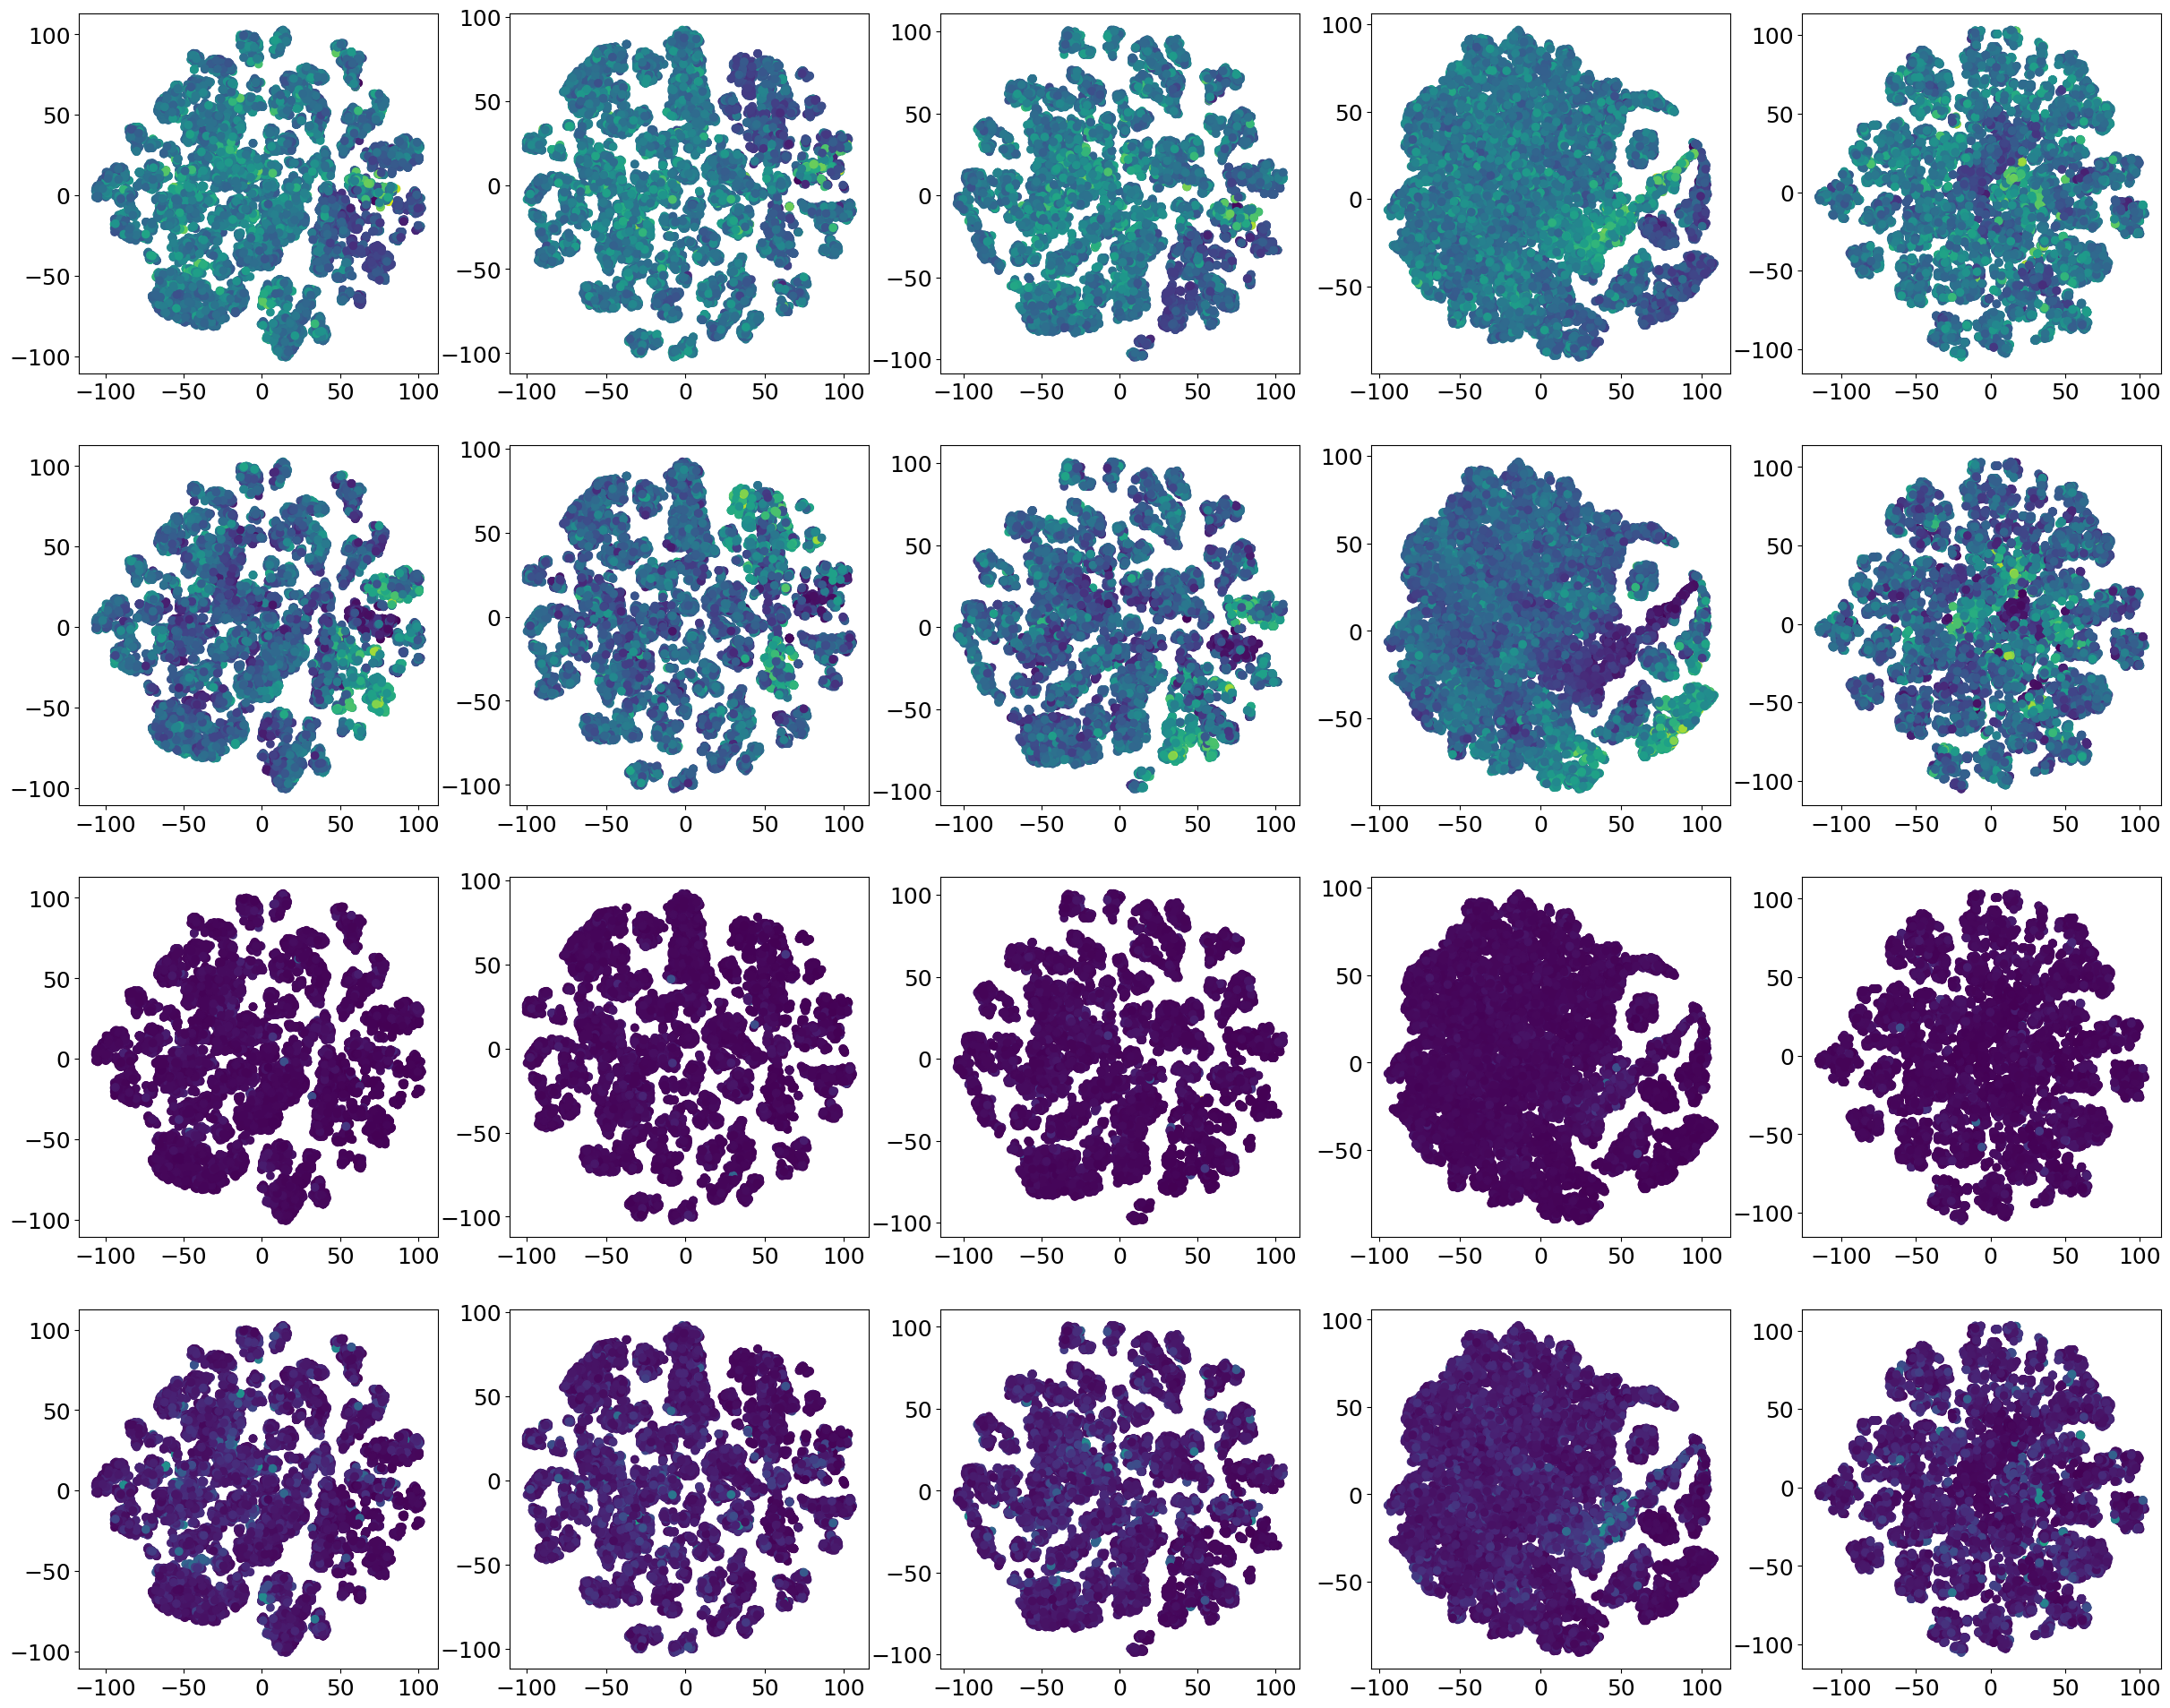

In [55]:
fig, ax = plt.subplots(4, 5)
fig.set_size_inches(30, 24)

ax[0,0].scatter(baseline_2d[:, 0], baseline_2d[:, 1], c=kh)
ax[0,1].scatter(nogeo_2d[:, 0], nogeo_2d[:, 1], c=kh)
ax[0,2].scatter(notopo_2d[:, 0], notopo_2d[:, 1], c=kh)
ax[0,3].scatter(nochem_2d[:, 0], nochem_2d[:, 1], c=kh)
ax[0,4].scatter(complexchem_2d[:, 0], complexchem_2d[:, 1], c=kh)

ax[1,0].scatter(baseline_2d[:, 0], baseline_2d[:, 1], c=ch4_wc)
ax[1,1].scatter(nogeo_2d[:, 0], nogeo_2d[:, 1], c=ch4_wc)
ax[1,2].scatter(notopo_2d[:, 0], notopo_2d[:, 1], c=ch4_wc)
ax[1,3].scatter(nochem_2d[:, 0], nochem_2d[:, 1], c=ch4_wc)
ax[1,4].scatter(complexchem_2d[:, 0], complexchem_2d[:, 1], c=ch4_wc)

ax[2,0].scatter(baseline_2d[:, 0], baseline_2d[:, 1], c=sel)
ax[2,1].scatter(nogeo_2d[:, 0], nogeo_2d[:, 1], c=sel)
ax[2,2].scatter(notopo_2d[:, 0], notopo_2d[:, 1], c=sel)
ax[2,3].scatter(nochem_2d[:, 0], nochem_2d[:, 1], c=sel)
ax[2,4].scatter(complexchem_2d[:, 0], complexchem_2d[:, 1], c=sel)

ax[3,0].scatter(baseline_2d[:, 0], baseline_2d[:, 1], c=co2_wc)
ax[3,1].scatter(nogeo_2d[:, 0], nogeo_2d[:, 1], c=co2_wc)
ax[3,2].scatter(notopo_2d[:, 0], notopo_2d[:, 1], c=co2_wc)
ax[3,3].scatter(nochem_2d[:, 0], nochem_2d[:, 1], c=co2_wc)
ax[3,4].scatter(complexchem_2d[:, 0], complexchem_2d[:, 1], c=co2_wc)


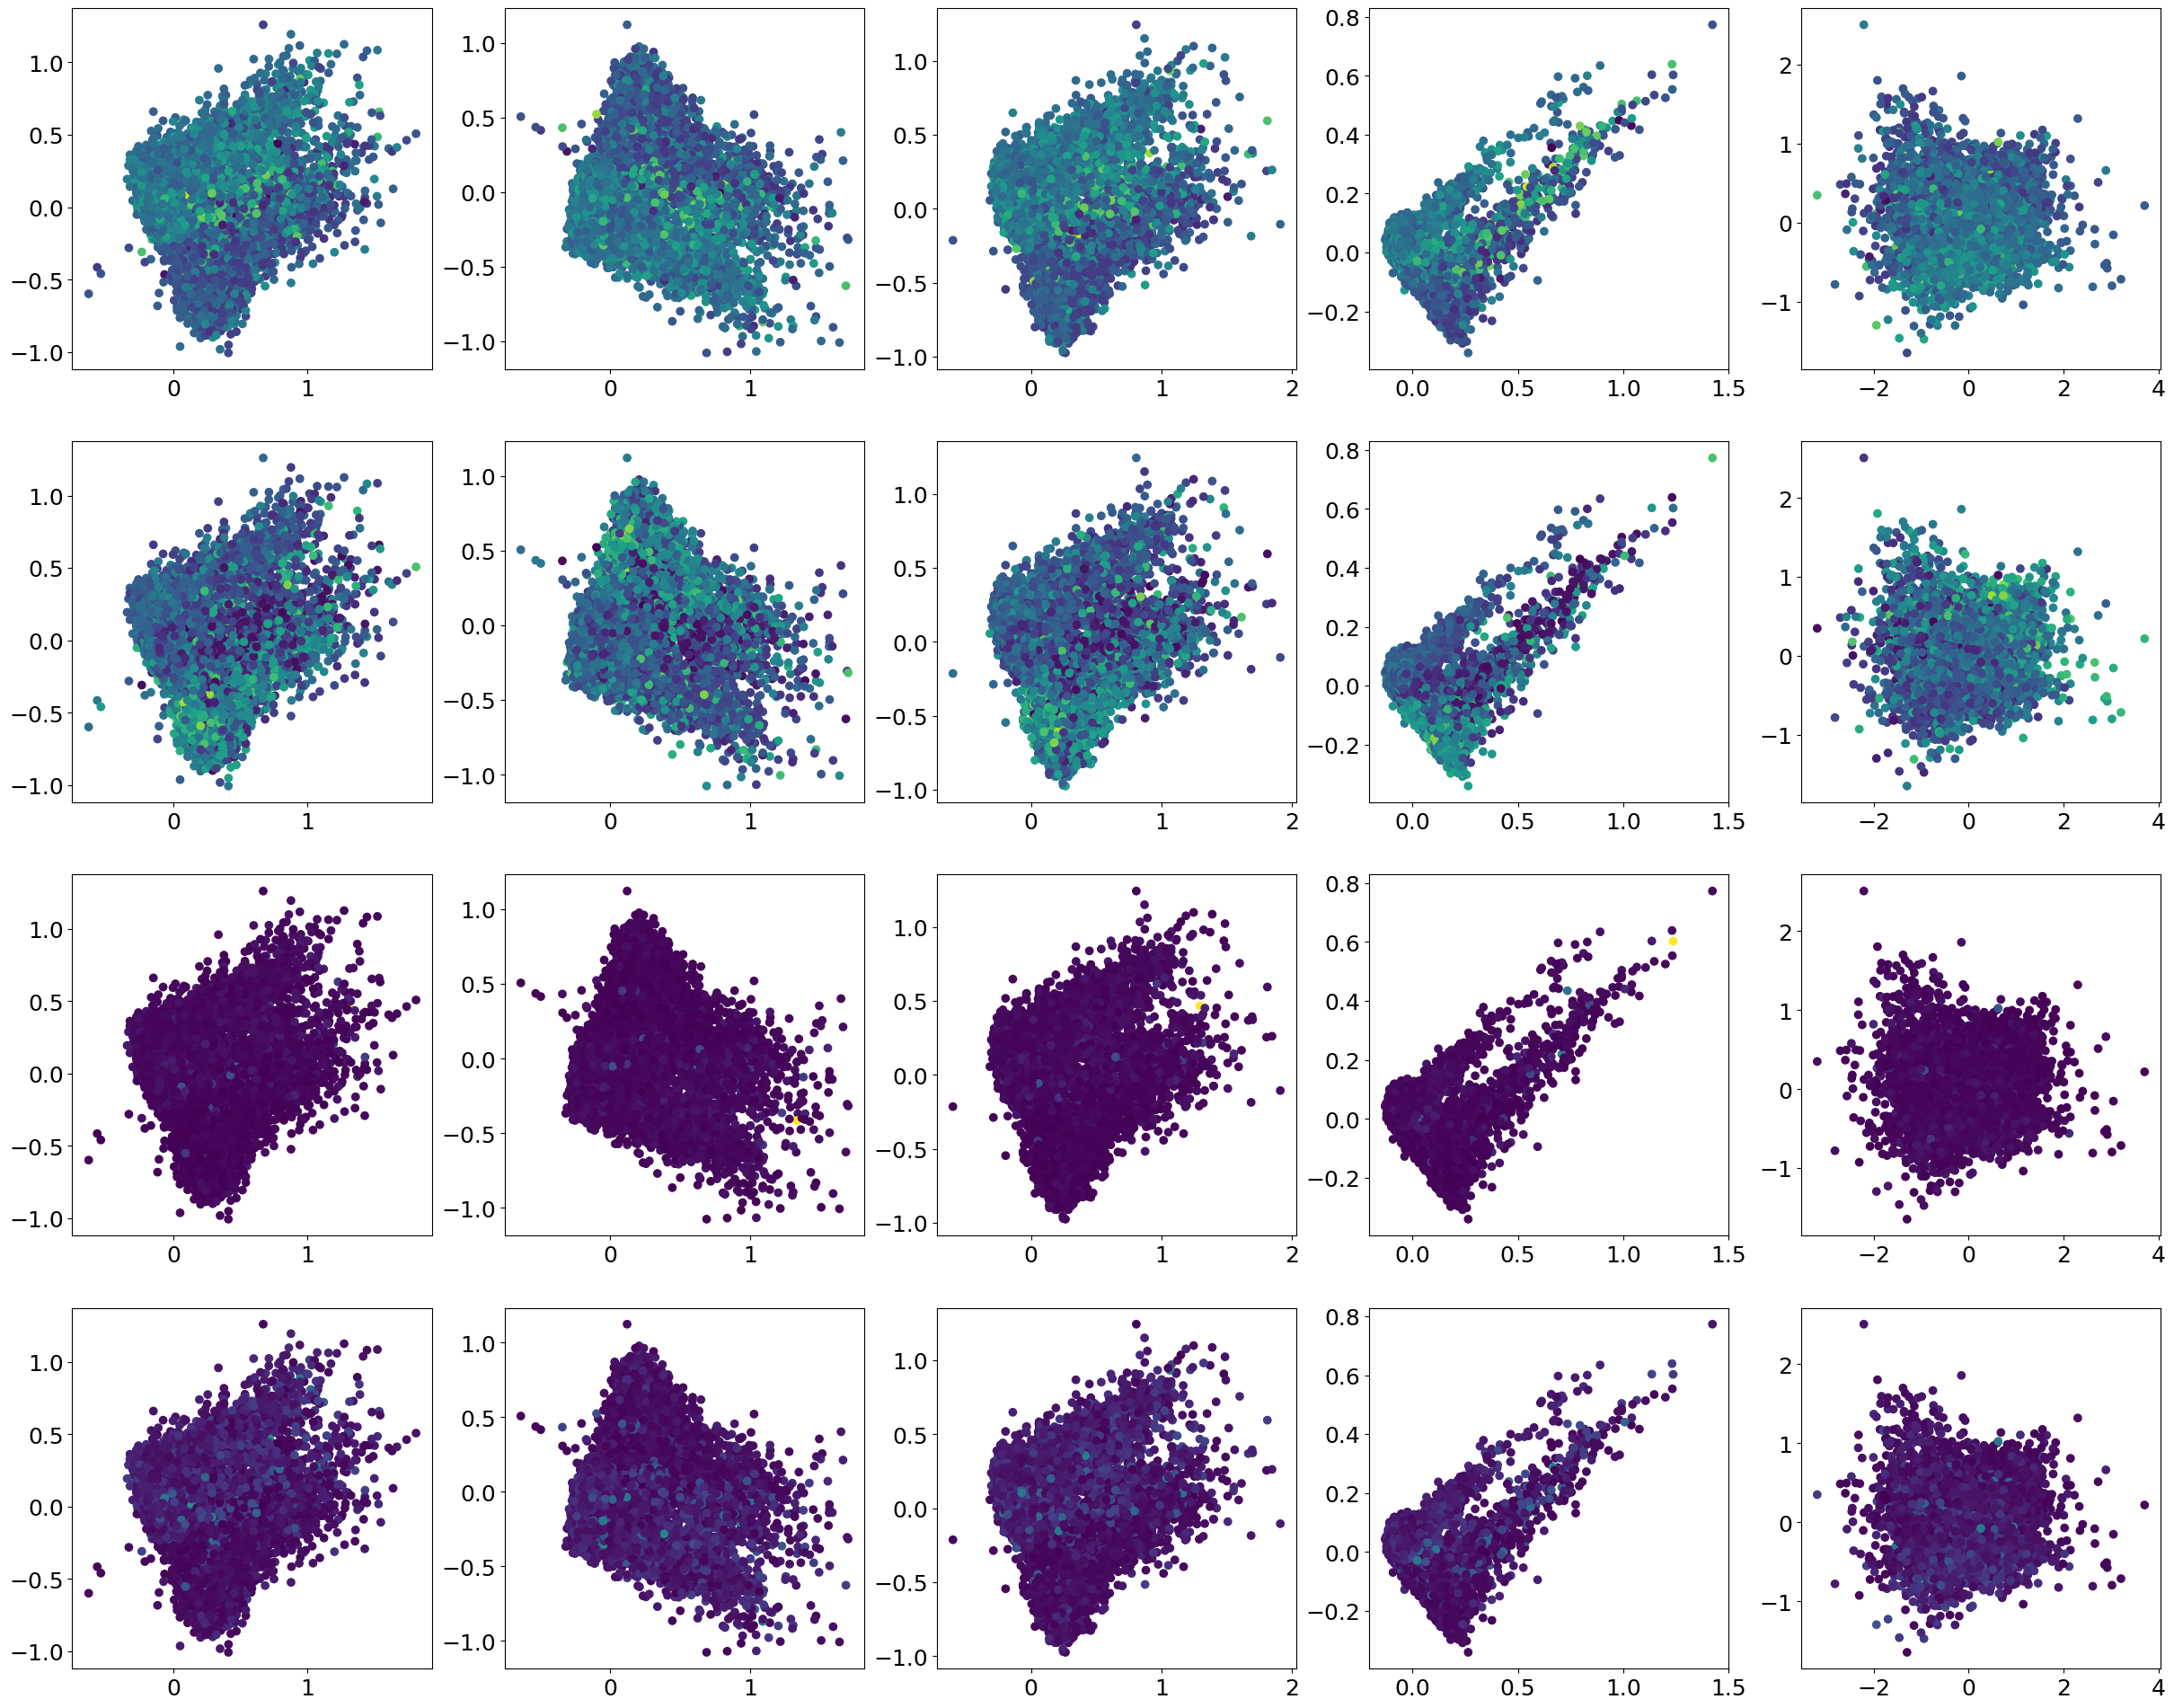

In [48]:
fig, ax = plt.subplots(4, 5)
fig.set_size_inches(30, 24)

ax[0,0].scatter(baseline_2d_pca[:, 0], baseline_2d_pca[:, 1], c=kh)
ax[0,1].scatter(nogeo_2d_pca[:, 0], nogeo_2d_pca[:, 1], c=kh)
ax[0,2].scatter(notopo_2d_pca[:, 0], notopo_2d_pca[:, 1], c=kh)
ax[0,3].scatter(nochem_2d_pca[:, 0], nochem_2d_pca[:, 1], c=kh)
ax[0,4].scatter(complexchem_2d_pca[:, 0], complexchem_2d_pca[:, 1], c=kh)

ax[1,0].scatter(baseline_2d_pca[:, 0], baseline_2d_pca[:, 1], c=ch4_wc)
ax[1,1].scatter(nogeo_2d_pca[:, 0], nogeo_2d_pca[:, 1], c=ch4_wc)
ax[1,2].scatter(notopo_2d_pca[:, 0], notopo_2d_pca[:, 1], c=ch4_wc)
ax[1,3].scatter(nochem_2d_pca[:, 0], nochem_2d_pca[:, 1], c=ch4_wc)
ax[1,4].scatter(complexchem_2d_pca[:, 0], complexchem_2d_pca[:, 1], c=ch4_wc)

ax[2,0].scatter(baseline_2d_pca[:, 0], baseline_2d_pca[:, 1], c=sel)
ax[2,1].scatter(nogeo_2d_pca[:, 0], nogeo_2d_pca[:, 1], c=sel)
ax[2,2].scatter(notopo_2d_pca[:, 0], notopo_2d_pca[:, 1], c=sel)
ax[2,3].scatter(nochem_2d_pca[:, 0], nochem_2d_pca[:, 1], c=sel)
ax[2,4].scatter(complexchem_2d_pca[:, 0], complexchem_2d_pca[:, 1], c=sel)

ax[3,0].scatter(baseline_2d_pca[:, 0], baseline_2d_pca[:, 1], c=co2_wc)
ax[3,1].scatter(nogeo_2d_pca[:, 0], nogeo_2d_pca[:, 1], c=co2_wc)
ax[3,2].scatter(notopo_2d_pca[:, 0], notopo_2d_pca[:, 1], c=co2_wc)
ax[3,3].scatter(nochem_2d_pca[:, 0], nochem_2d_pca[:, 1], c=co2_wc)
ax[3,4].scatter(complexchem_2d_pca[:, 0], complexchem_2d_pca[:, 1], c=co2_wc)

In [56]:
ch4_kh_baseline = 0.01393
ch4_kh_nogeo = 0.02249
ch4_kh_notopo = 0.01604
ch4_kh_nochem = 0.02169

In [61]:
contri_kh_geo = np.abs(ch4_kh_baseline - ch4_kh_nogeo) / ch4_kh_baseline
contri_kh_topo = np.abs(ch4_kh_baseline - ch4_kh_notopo) / ch4_kh_baseline
contri_kh_chem = np.abs(ch4_kh_baseline - ch4_kh_nochem) / ch4_kh_baseline

contri_kh_geo_norm = contri_kh_geo / (contri_kh_geo + contri_kh_topo + contri_kh_chem)
contri_kh_topo_norm = contri_kh_topo / (contri_kh_geo + contri_kh_topo + contri_kh_chem)
contri_kh_chem_norm = contri_kh_chem / (contri_kh_geo + contri_kh_topo + contri_kh_chem)

In [62]:
contri_kh_geo_norm, contri_kh_topo_norm, contri_kh_chem_norm

(0.4644601193705915, 0.11448724905046116, 0.42105263157894746)

xq.ch4_logkh

- baseline
wandb:  test_mae 0.09797
wandb:  test_mse 0.01593
wandb:   test_r2 0.59449
wandb: train_mae 0.05143
wandb: train_mse 0.00445
wandb:  train_r2 0.88667

- nogeo

wandb:  test_mae 0.11734
wandb:  test_mse 0.02249
wandb:   test_r2 0.42758
wandb: train_mae 0.06149
wandb: train_mse 0.00628
wandb:  train_r2 0.84

- notopo
wandb:  test_mae 0.09936
wandb:  test_mse 0.01604
wandb:   test_r2 0.59177
wandb: train_mae 0.05277
wandb: train_mse 0.00463
wandb:  train_r2 0.88202

- nochem
wandb:  test_mae 0.11348
wandb:  test_mse 0.02169
wandb:   test_r2 0.44813
wandb: train_mae 0.04859
wandb: train_mse 0.00387
wandb:  train_r2 0.90157

- hash1
wandb:  test_mae 0.10577
wandb:  test_mse 0.01844
wandb:   test_r2 0.53062
wandb: train_mae 0.04852
wandb: train_mse 0.00388
wandb:  train_r2 0.90113


- hash3
wandb:  test_mae 0.09402
wandb:  test_mse 0.01393
wandb:   test_r2 0.64561
wandb: train_mae 0.0425
wandb: train_mse 0.003
wandb:  train_r2 0.92367


xq.ch4_wc

- baseline 
wandb:  test_mae 1.49093
wandb:  test_mse 3.68594
wandb:   test_r2 0.76111
wandb: train_mae 0.79766
wandb: train_mse 1.07488
wandb:  train_r2 0.9309

- nogeo
wandb:  test_mae 2.13391
wandb:  test_mse 7.51327
wandb:   test_r2 0.51305
wandb: train_mae 1.22601
wandb: train_mse 2.58507
wandb:  train_r2 0.83381

- notopo
wandb:  test_mae 1.66462
wandb:  test_mse 4.63329
wandb:   test_r2 0.69971
wandb: train_mae 0.92062
wandb: train_mse 1.41547
wandb:  train_r2 0.909

- nochem
wandb:  test_mae 1.54325
wandb:  test_mse 4.09377
wandb:   test_r2 0.73467
wandb: train_mae 0.64904
wandb: train_mse 0.69872
wandb:  train_r2 0.95508

- hash1
wandb:  test_mae 1.4644
wandb:  test_mse 3.77534
wandb:   test_r2 0.75531
wandb: train_mae 0.70448
wandb: train_mse 0.83295
wandb:  train_r2 0.94645

- hash3
wandb:  test_mae 1.44807
wandb:  test_mse 3.57461
wandb:   test_r2 0.76832
wandb: train_mae 0.67204
wandb: train_mse 0.77345
wandb:  train_r2 0.95028

xq.co2_n2_selectivity

- baseline
wandb:  test_mae 3.78144
wandb:  test_mse 47.98135
wandb:   test_r2 0.33252
wandb: train_mae 3.06221
wandb: train_mse 40.4894
wandb:  train_r2 0.6059

- nogeo
wandb:  test_mae 4.51407
wandb:  test_mse 60.18998
wandb:   test_r2 0.16268
wandb: train_mae 3.84242
wandb: train_mse 56.88209
wandb:  train_r2 0.44634

- notopo

wandb:  test_mae 4.03119
wandb:  test_mse 51.82303
wandb:   test_r2 0.27908
wandb: train_mae 3.28395
wandb: train_mse 44.46003
wandb:  train_r2 0.56725

- nochem
wandb:  test_mae 4.03311
wandb:  test_mse 50.97753
wandb:   test_r2 0.29084
wandb: train_mae 2.95906
wandb: train_mse 37.91074
wandb:  train_r2 0.631

- hash1
wandb:  test_mae 3.88846
wandb:  test_mse 48.9418
wandb:   test_r2 0.31916
wandb: train_mae 3.01047
wandb: train_mse 38.83603
wandb:  train_r2 0.62199

- hash3
wandb:  test_mae 3.66699
wandb:  test_mse 43.40447
wandb:   test_r2 0.39619
wandb: train_mae 2.88591
wandb: train_mse 40.2546
wandb:  train_r2 0.60818

In [63]:
sel_baseline = 43.40447
sel_nogeo = 60.18998
sel_notopo = 51.82303
sel_nochem = 50.97753

In [64]:
contri_sel_geo = np.abs(sel_baseline - sel_nogeo) / sel_baseline
contri_sel_topo = np.abs(sel_baseline - sel_notopo) / sel_baseline
contri_sel_chem = np.abs(sel_baseline - sel_nochem) / sel_baseline

contri_sel_geo_norm = contri_sel_geo / (contri_sel_geo + contri_sel_topo + contri_sel_chem)
contri_sel_topo_norm = contri_sel_topo / (contri_sel_geo + contri_sel_topo + contri_sel_chem)
contri_sel_chem_norm = contri_sel_chem / (contri_sel_geo + contri_sel_topo + contri_sel_chem)

In [65]:
contri_sel_geo_norm, contri_sel_topo_norm, contri_sel_chem_norm

(0.5121104257755331, 0.2568424996331284, 0.23104707459133852)

xq.co2_n2_wc

-baseline
wandb:  test_mae 0.17112
wandb:  test_mse 0.05821
wandb:   test_r2 0.56686
wandb: train_mae 0.08538
wandb: train_mse 0.01273
wandb:  train_r2 0.91501

- nogeo
wandb:  test_mae 0.21314
wandb:  test_mse 0.09346
wandb:   test_r2 0.30459
wandb: train_mae 0.1114
wandb: train_mse 0.02266
wandb:  train_r2 0.84872

- notopo
wandb:  test_mae 0.17833
wandb:  test_mse 0.06034
wandb:   test_r2 0.55103
wandb: train_mae 0.08824
wandb: train_mse 0.01338
wandb:  train_r2 0.91065

- nochem 
wandb:   test_mae 0.18625
wandb:   test_mse 0.0746
wandb:    test_r2 0.44492
wandb:  train_mae 0.07848
wandb:  train_mse 0.00997
wandb:   train_r2 0.93346

- hash1
wandb:  test_mae 0.17345
wandb:  test_mse 0.0609
wandb:   test_r2 0.54687
wandb: train_mae 0.07724
wandb: train_mse 0.00989
wandb:  train_r2 0.93401

- hash3
wandb:  test_mae 0.15744
wandb:  test_mse 0.04885
wandb:   test_r2 0.63649
wandb: train_mae 0.0711
wandb: train_mse 0.0089
wandb:  train_r2 0.9406

In [66]:
co2_wc_baseline = 0.04885
co2_wc_geo = 0.09346
co2_wc_topo = 0.06034
co2_wc_chem = 0.0746

In [67]:
contri_co2_wc_geo = np.abs(co2_wc_baseline - co2_wc_geo) / co2_wc_baseline
contri_co2_wc_topo = np.abs(co2_wc_baseline - co2_wc_topo) / co2_wc_baseline
contri_co2_wc_chem = np.abs(co2_wc_baseline - co2_wc_chem) / co2_wc_baseline

contri_co2_wc_geo_norm = contri_co2_wc_geo / (contri_co2_wc_geo + contri_co2_wc_topo + contri_co2_wc_chem)
contri_co2_wc_topo_norm = contri_co2_wc_topo / (contri_co2_wc_geo + contri_co2_wc_topo + contri_co2_wc_chem)
contri_co2_wc_chem_norm = contri_co2_wc_chem / (contri_co2_wc_geo + contri_co2_wc_topo + contri_co2_wc_chem)

In [68]:
contri_co2_wc_geo_norm, contri_co2_wc_topo_norm, contri_co2_wc_chem_norm

(0.5450213805742211, 0.1403787416004887, 0.31459987782529014)